# Imports

In [1]:
from ase import Atoms

In [2]:
from ase.build import bulk

In [3]:
from ase.calculators.morse import MorsePotential

In [4]:
from pyiron_contrib.tinybase.ase import AseStaticTask, AseMDTask, AseMinimizeTask

/home/poul/pyiron/contrib/pyiron_contrib/__init__.py:9: UserWarning: pyiron module not found, importing Project from pyiron_base
  warnings.warn("pyiron module not found, importing Project from pyiron_base")


In [5]:
from pyiron_contrib.tinybase.murn import MurnaghanTask

In [6]:
from pyiron_contrib.tinybase.executor import ProcessExecutor, BackgroundExecutor, Executor

In [7]:
import logging
logging.getLogger().setLevel(20)

# Simple ASE Static Calculation

In [8]:
a = AseStaticTask()

In [9]:
a.input.structure = bulk("Fe")

In [10]:
a.input.calculator = MorsePotential()

In [11]:
ret, output = a.execute(); ret, output

(ReturnStatus(Code.DONE, None),
 <pyiron_contrib.tinybase.container.EnergyPotOutput at 0x7f3dddc33a90>)

In [12]:
output.energy_pot

-0.00013307075712109978

# ASE MD

In [13]:
md = AseMDTask()

In [14]:
md.input.structure = bulk("Fe", a=1.2, cubic=True).repeat(3)
md.input.calculator = MorsePotential()

In [15]:
md.input.steps = 100
md.input.timestep = 3.0
md.input.temperature = 600.0
md.input.output_steps = 20

In [16]:
exe = ProcessExecutor(max_processes=4).submit([md])
exe.run()

In [17]:
exe.wait()

In [18]:
exe._run_machine._data

{'status': [ReturnStatus(Code.DONE, None)],
 'output': [<pyiron_contrib.tinybase.container.MDOutput at 0x7f3dddc7c0d0>]}

In [19]:
exe._run_machine.state

<Code.FINISHED: 'finished'>

In [20]:
exe._run_time

11.99578764900798

In [21]:
exe._collect_time

2.5072979042306542e-05

In [22]:
exe.output[0].pot_energies

[-303.20813267693006,
 -303.20813267693006,
 -299.50793416220245,
 -300.5497430006916,
 -300.2227526899692,
 -299.9803776735141,
 -300.4174233564278,
 -300.47761929956704,
 -300.9284829694475,
 -300.7290011651538,
 -300.13461682002395,
 -299.6448595164918,
 -300.7999265006333,
 -300.61980282686807,
 -299.87975459727386,
 -300.00429868718913,
 -300.03868103245054,
 -300.10316958162093,
 -300.94069501802824,
 -300.33250647975046,
 -300.6353629828311,
 -300.6098904517182]

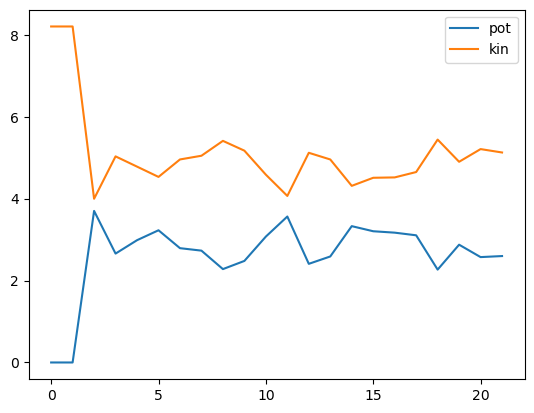

In [23]:
exe.output[0].plot_energies()

In [24]:
# Testing env doesn't have nglview
# exe.output[0].animate_structures()

# ASE Minimize

In [25]:
from pyiron_atomistics import ase_to_pyiron

In [26]:
mi = AseMinimizeTask()

In [27]:
dimer = Atoms(symbols=['Fe', 'Fe'], positions=[[0,0,0], [0,0, .75]], cell=[10,10,10])

In [28]:
mi.input.structure = dimer
mi.input.calculator = MorsePotential(rcut1=6,rcut2=10)

In [29]:
# Testing env doesn't have nglview
# ase_to_pyiron(mi.input.structure).plot3d()

NGLWidget()

In [30]:
mi.input.max_steps = 100
mi.input.output_steps = 1
mi.input.ionic_force_tolerance = 1e-6

In [31]:
mi.input.gpmin()

In [32]:
exe = Executor().submit([mi])

In [33]:
exe.run()

       Step     Time          Energy         fmax
GPMin:    0 12:25:12       11.122159      187.2462
GPMin:    1 12:25:12       -0.278268        1.5338
GPMin:    2 12:25:12       -0.996055        0.8010
GPMin:    3 12:25:12       -0.000000        0.0000


In [34]:
exe.status

(ReturnStatus(Code.DONE, None),)

In [35]:
abs(exe.output[0].forces[-1]).max()

2.136147842601888e-07

In [36]:
exe._run_machine.state

<Code.FINISHED: 'finished'>

In [37]:
exe._run_time

0.04363919500610791

In [38]:
exe._collect_time

1.127301948145032e-05

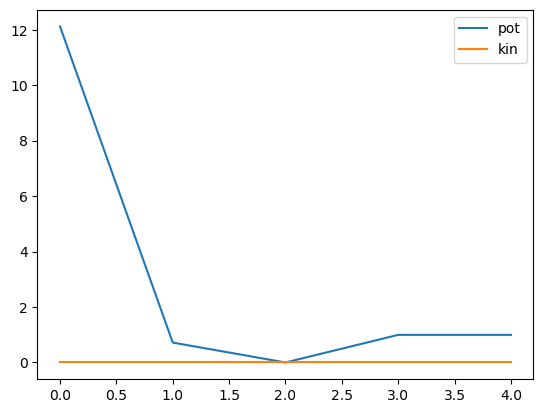

In [39]:
exe.output[0].plot_energies()

In [40]:
exe.output[0].pot_energies

[11.122158782511535,
 -0.2782678462106827,
 -0.9960554302957411,
 -3.560246436024868e-08,
 -3.560246436024868e-08]

In [41]:
exe.output[0].animate_structures()

NGLWidget(max_frame=4)

# Murnaghan

## Basic

In [42]:
m = MurnaghanTask(capture_exceptions=False)

In [43]:
m.input.task = AseStaticTask(capture_exceptions=False)
m.input.task.input.calculator = MorsePotential()
m.input.structure = bulk("Fe", a=1.2)

In [44]:
m.input.task.input

In [45]:
m.input.set_strain_range(.5, 50)

In [46]:
m.input.strains

array([0.79370053, 0.8043555 , 0.81473542, 0.82485739, 0.83473686,
       0.84438786, 0.85382314, 0.86305437, 0.87209225, 0.88094658,
       0.88962642, 0.89814011, 0.90649538, 0.9146994 , 0.92275884,
       0.93067991, 0.93846839, 0.94612969, 0.95366889, 0.96109074,
       0.96839969, 0.97559996, 0.98269548, 0.98968999, 0.996587  ,
       1.00338986, 1.01010169, 1.0167255 , 1.02326411, 1.0297202 ,
       1.03609634, 1.04239496, 1.04861836, 1.05476875, 1.06084824,
       1.06685884, 1.07280247, 1.07868096, 1.08449606, 1.09024946,
       1.09594278, 1.10157754, 1.10715524, 1.11267731, 1.1181451 ,
       1.12355993, 1.12892306, 1.13423572, 1.13949907, 1.14471424])

In [47]:
m.input.check_ready()

True

In [48]:
_, output = m.execute()

In [49]:
_

ReturnStatus(Code.DONE, None)

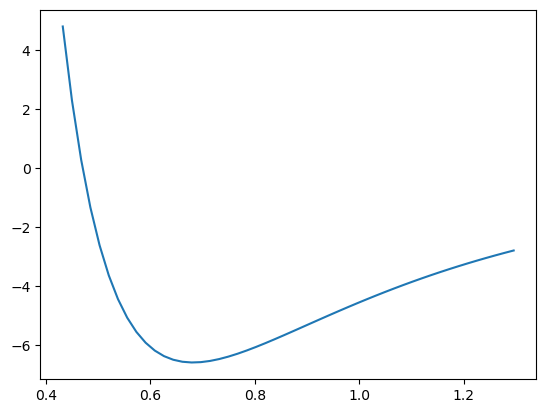

In [50]:
output.plot()

In [51]:
output.equilibrium_volume

0.6788586373205143

In [52]:
output.get_structure().get_volume()

0.6788586373205143

In [53]:
output.get_structure()

Atoms(symbols='Fe', pbc=True, cell=[[-0.5536557129291797, 0.5536557129291797, 0.5536557129291797], [0.5536557129291797, -0.5536557129291797, 0.5536557129291797], [0.5536557129291797, 0.5536557129291797, -0.5536557129291797]])

## With an Executor

In [54]:
m = MurnaghanTask()

In [55]:
m.input.task = AseStaticTask()
m.input.task.input.calculator = MorsePotential()
m.input.structure = bulk("Fe", a=1.2)

In [56]:
m.input.task.input

In [57]:
m.input.set_strain_range(.6, 250)

In [58]:
%%time
exe = ProcessExecutor(max_processes=8).submit([m])
exe.run()
exe.wait()

CPU times: user 490 ms, sys: 280 ms, total: 770 ms
Wall time: 3.56 s


In [59]:
from pyiron_contrib.tinybase.executor import DaskExecutor

In [ ]:
%%time
exe = DaskExecutor.from_localcluster(2).submit([m])
exe.run()
exe.wait()

/home/poul/pyiron/contrib/pyiron_contrib/__init__.py:9: UserWarning: pyiron module not found, importing Project from pyiron_base
  warnings.warn("pyiron module not found, importing Project from pyiron_base")
/home/poul/pyiron/contrib/pyiron_contrib/__init__.py:9: UserWarning: pyiron module not found, importing Project from pyiron_base
  warnings.warn("pyiron module not found, importing Project from pyiron_base")


In [ ]:
exe.status

In [ ]:
exe.output[0].plot()

# Combine Minimize and Murnaghan

In [ ]:
m = MurnaghanTask()

In [ ]:
m.input.task = AseMinimizeTask()
m.input.task.input.calculator = MorsePotential()
m.input.task.input.max_steps = 100
m.input.task.input.output_steps = 10
m.input.task.input.ionic_force_tolerance = 1e-6
m.input.task.input.lbfgs()

m.input.structure = bulk("Fe", a=1.2)

In [ ]:

m.input.set_strain_range(.5, 500)

In [ ]:
%%time
exe = ProcessExecutor(max_processes=4).submit([m])
exe.run()
exe.wait()
output = exe.output[0]
ret = exe.status[0]

In [ ]:
ret

In [ ]:
output.energies[:10]

In [ ]:
output.plot()